In [1]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import statsmodels.api as sm
from scipy.stats import poisson
import pyreadr
from rdatasets import data
from scipy import stats

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 1 Binary regression


### (a) Exploration

#### (i)

Importing the csv file 

In [2]:
weather = pd.read_csv("weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


dropping rows with NA values in it

In [4]:
weather = pd.read_csv("weatherAUS.csv")
weather = weather.dropna(axis=0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


transforming RainTomorrow and RainToday to something
more suitable for binary regression analysis

In [5]:
import statsmodels.formula.api as smf

In [6]:
weather["RainTomorrow2"] = 1 * (weather.RainTomorrow == 'No')
weather["RainToday2"] = 1 * (weather.RainToday == 'No')

In [7]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow2,RainToday2
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,1,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,1,1
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,1,1
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,1,1
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,1,1
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,1,1
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,1,1
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,1,1


#### (ii)

1. How many unique values are there in the Date column?

In [8]:
weather.Date.nunique()

3416

2. How many unique values are there in the Location column

In [9]:
weather.Location.nunique()

26

3. It’s not possible to fit RainTomorrow ~ Date * Location. Why?
---- because its not relevant to the data

4. We won’t be using Date anymore, so remove Date from the weather data.

In [10]:
weather_2 = weather.drop(['Date'], axis=1)
weather_2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow2,RainToday2
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,1,1
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,1,1
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,1,1
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,1,1
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,1,1
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,1,1
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,1,1


#### (iii)
What are the unique locations in the data set? Display each unique location along with how
many times it appears in the data set.

In [11]:
weather_2.Location.value_counts()

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64

1. List all the possible wind directions.

In [12]:
import pandas as pd

wind_dir = ['WindGustDir','WindDir9am', 'WindDir3pm']
weather_2[wind_dir].values.tolist()

[['SSW', 'ENE', 'SW'],
 ['S', 'SSE', 'SSE'],
 ['NNE', 'NNE', 'NNW'],
 ['WNW', 'WNW', 'WSW'],
 ['WNW', 'NW', 'WNW'],
 ['N', 'N', 'WNW'],
 ['SSW', 'S', 'SSE'],
 ['SE', 'SE', 'S'],
 ['ENE', 'ENE', 'WSW'],
 ['NE', 'NNE', 'WSW'],
 ['E', 'SE', 'ENE'],
 ['ENE', 'NE', 'N'],
 ['SSW', 'N', 'NNW'],
 ['SW', 'W', 'SW'],
 ['SW', 'S', 'S'],
 ['S', 'S', 'SW'],
 ['SE', 'NE', 'SE'],
 ['NNE', 'ENE', 'NNE'],
 ['W', 'N', 'NW'],
 ['N', 'NW', 'N'],
 ['WNW', 'N', 'N'],
 ['WSW', 'NNE', 'NW'],
 ['NNW', 'SSW', 'SW'],
 ['SSW', 'SE', 'ENE'],
 ['S', 'ENE', 'E'],
 ['ENE', 'ENE', 'ESE'],
 ['E', 'NNE', 'ENE'],
 ['ENE', 'NNE', 'NNE'],
 ['ESE', 'NNE', 'ESE'],
 ['ENE', 'NNE', 'NE'],
 ['SE', 'W', 'SSE'],
 ['S', 'NNE', 'NNE'],
 ['WSW', 'E', 'SSW'],
 ['ENE', 'NE', 'WSW'],
 ['NNW', 'N', 'N'],
 ['WNW', 'NNW', 'NNW'],
 ['NNE', 'NNE', 'ENE'],
 ['NNE', 'N', 'NNE'],
 ['SW', 'SSW', 'SSW'],
 ['SSW', 'S', 'SSW'],
 ['SW', 'SSW', 'S'],
 ['S', 'S', 'SE'],
 ['E', 'E', 'E'],
 ['ESE', 'ESE', 'ESE'],
 ['SE', 'SE', 'ESE'],
 ['ESE', 'SE', 'S

2. What are the wind direction covariaties? Do all of them have the same set of possible
wind directions?

---The wind direction covariates are 'WindGustDir','WindDir9am', 'WindDir3pm,' and they do not have the same set of possible
wind directions

3.

In [13]:
smf.glm(formula = "RainTomorrow2 ~ WindGustDir", data = weather_2, family=sm.families.Binomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56404
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29375.
Date:                Thu, 24 Nov 2022   Deviance:                       58750.
Time:                        20:51:13   Pearson chi2:                 5.64e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.6674      0.041     40.951      0.000       1.588       1.747
WindGustDir[T.ENE]     0.0676      0.060      1.125      0.260      -0.050       0.185
WindGustDir[T.ESE]    -0.1030      0.061     -1.677      0.094      -0.223       0.017
WindGustDir[T.N]      -0.6659      0.054    -12.437      0.000      -0.771      -0.561
WindGustDir[T.NE]     -0.1462      0.062     -2.374      0.018      -0.267      -0.025
WindGustDir[T.NNE]    -0.4932      0.062     -7.936      0.000      -0.615      -0.371
WindGustDir[T.NNW]    -0.6794      0.062    -10.924      0.000      -0.801      -0.557
WindGustDir[T.NW]     -0.7841      0.059    -13.239      0.000      -0.900      -0.668
WindGustDir[T.S]      -0.3744      0.057     -6.532      0.000      -0.487      -0.262
WindGustDir[T.SE]     -0.2425      0.057     -4.231      0.000      -0.355      -0.130
WindGustDir[T.SSE]    -0.3149      0.059     -5.310      0.000      -0.431      -0.199
WindGustDir[T.SSW]    -0.3292      0.057     -5.804      0.000      -0.440      -0.218
WindGustDir[T.SW]     -0.2556      0.057     -4.502      0.000      -0.367      -0.144
WindGustDir[T.W]      -0.7157      0.053    -13.397      0.000      -0.820      -0.611
WindGustDir[T.WNW]    -0.8742      0.057    -15.410      0.000      -0.985      -0.763
WindGustDir[T.WSW]    -0.5522      0.055     -9.956      0.000      -0.661      -0.443
======================================================================================
"""

How many parameters are fitted in the model "RainTomorrow ~ WindGustDir"?

-- There are 16 parameters fitted in the model "RainTomorrow ~ WindGustDir"

### (b) Locations

#### (i) Fit a logistic model with Location as its only covariate.


In [14]:
fit8 = smf.glm(formula = "RainTomorrow2 ~ Location -1 ", data = weather_2, family=sm.families.Binomial()).fit()
fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56394
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28881.
Date:                Thu, 24 Nov 2022   Deviance:                       57761.
Time:                        20:51:16   Pearson chi2:                 5.64e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Location[AliceSprings]         2.3876      0.076     31.247      0.000       2.238       2.537
Location[Brisbane]             1.2808      0.045     28.710      0.000       1.193       1.368
Location[Cairns]               0.8129      0.044     18.540      0.000       0.727       0.899
Location[Canberra]             1.3667      0.076     18.054      0.000       1.218       1.515
Location[Cobar]                2.0117      0.134     14.996      0.000       1.749       2.275
Location[CoffsHarbour]         0.7893      0.058     13.589      0.000       0.675       0.903
Location[Darwin]               1.0581      0.041     25.607      0.000       0.977       1.139
Location[Hobart]               1.1452      0.053     21.579      0.000       1.041       1.249
Location[Melbourne]            1.1085      0.053     20.859      0.000       1.004       1.213
Location[MelbourneAirport]     1.2824      0.045     28.615      0.000       1.195       1.370
Location[Mildura]              2.0764      0.062     33.275      0.000       1.954       2.199
Location[Moree]                1.8586      0.067     27.767      0.000       1.727       1.990
Location[MountGambier]         0.8618      0.044     19.551      0.000       0.775       0.948
Location[NorfolkIsland]        0.8400      0.044     19.135      0.000       0.754       0.926
Location[Nuriootpa]            1.4260      0.056     25.254      0.000       1.315       1.537
Location[Perth]                1.3637      0.045     30.204      0.000       1.275       1.452
Location[PerthAirport]         1.4511      0.047     30.714      0.000       1.358       1.544
Location[Portland]             0.4037      0.047      8.537      0.000       0.311       0.496
Location[Sale]                 1.3013      0.060     21.860      0.000       1.185       1.418
Location[Sydney]               1.1192      0.056     19.820      0.000       1.009       1.230
Location[SydneyAirport]        1.1033      0.043     25.563      0.000       1.019       1.188
Location[Townsville]           1.6370      0.055     29.729      0.000       1.529       1.745
Location[WaggaWagga]           1.5386      0.053     28.848      0.000       1.434       1.643
Location[Watsonia]             1.0957      0.044     24.808      0.000       1.009       1.182
Location[Williamtown]          1.0093      0.065     15.457      0.000       0.881       1.137
Location[Woomera]              2.5211      0.092     27.548      0.000       2.342       2.700
==============================================================================================
"""

1. What is the probabilty of Alice Springs?

In [15]:
Alice_spring = 2.3876
Alice_spring

2.3876

-- the probability of Alice spring is = 2.3876 (as it is the intercept)

2. What location has smallest probabilty? 

In [16]:
small_prob = 2.3876 + (-1.9840) 
small_prob

0.40359999999999996

-- Smallest probabilty is in location: Portland
   with the probabilty: 0.4036

3. What location has the highest probability?

In [17]:
high_prob = 2.3876 + 0.1334
high_prob

2.521

-- Highest probality is in location: Woomera with probabilty: 2.521


In [18]:
#these values above are caluctaing adding the intercept

#### (ii)

1. Make a table that displays the probability of rain tomorrow for each location along with
a confidence interval. Be sure to include AliceSprings!

In [19]:
table1 = fit8.conf_int()
table1.colunms = ['0.025', '0975']
table1

<ipython-input-19-55559950f6c4>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  table1.colunms = ['0.025', '0975']


,0,1
Location[AliceSprings],2.237870,2.537398
Location[Brisbane],1.193407,1.368288
Location[Cairns],0.726921,0.898783
Location[Canberra],1.218330,1.515065
Location[Cobar],1.748795,2.274652
Location[CoffsHarbour],0.675455,0.903146
Location[Darwin],0.977103,1.139076
Location[Hobart],1.041212,1.249247
Location[Melbourne],1.004318,1.212625
Location[MelbourneAirport],1.194581,1.370255


2. Fit a model you can use to predict the probability of rain tomorrow from the probability
of rain today, ignoring location. What’s the McFadden 𝑅2 of this model? 

In [20]:
logit_fit1 = smf.glm("RainTomorrow2 ~ Location", data = weather_2, family=sm.families.Binomial()).fit()

def rsq_mcfadden(fit8):
    lower = fit8.llnull
    upper = fit8.llf
    
    return 1 - upper / lower

print( rsq_mcfadden(logit_fit1))

0.029108952015018175


#### (iii) 


Fit a model using both location and rain.

In [21]:
model1 = smf.glm(formula = "RainTomorrow2  ~ Location + Rainfall", data = weather_2, family=sm.families.Binomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56393
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27376.
Date:                Thu, 24 Nov 2022   Deviance:                       54752.
Time:                        20:51:23   Pearson chi2:                 2.12e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.5435      0.079     32.259      0.000       2.389       2.698
Location[T.Brisbane]            -0.9956      0.092    -10.856      0.000      -1.175      -0.816
Location[T.Cairns]              -1.3758      0.092    -15.004      0.000      -1.556      -1.196
Location[T.Canberra]            -0.9680      0.111     -8.733      0.000      -1.185      -0.751
Location[T.Cobar]               -0.3713      0.159     -2.342      0.019      -0.682      -0.061
Location[T.CoffsHarbour]        -1.4200      0.100    -14.212      0.000      -1.616      -1.224
Location[T.Darwin]              -1.1035      0.090    -12.194      0.000      -1.281      -0.926
Location[T.Hobart]              -1.2353      0.096    -12.933      0.000      -1.422      -1.048
Location[T.Melbourne]           -1.2458      0.096    -13.021      0.000      -1.433      -1.058
Location[T.MelbourneAirport]    -1.1130      0.091    -12.230      0.000      -1.291      -0.935
Location[T.Mildura]             -0.3446      0.101     -3.403      0.001      -0.543      -0.146
Location[T.Moree]               -0.4810      0.105     -4.578      0.000      -0.687      -0.275
Location[T.MountGambier]        -1.4958      0.091    -16.501      0.000      -1.673      -1.318
Location[T.NorfolkIsland]       -1.4708      0.091    -16.184      0.000      -1.649      -1.293
Location[T.Nuriootpa]           -0.9742      0.097     -9.999      0.000      -1.165      -0.783
Location[T.Perth]               -0.9795      0.091    -10.713      0.000      -1.159      -0.800
Location[T.PerthAirport]        -0.8979      0.092     -9.708      0.000      -1.079      -0.717
Location[T.Portland]            -1.8949      0.092    -20.508      0.000      -2.076      -1.714
Location[T.Sale]                -1.0871      0.099    -10.944      0.000      -1.282      -0.892
Location[T.Sydney]              -1.1458      0.099    -11.619      0.000      -1.339      -0.953
Location[T.SydneyAirport]       -1.1926      0.091    -13.156      0.000      -1.370      -1.015
Location[T.Townsville]          -0.6802      0.098     -6.965      0.000      -0.872      -0.489
Location[T.WaggaWagga]          -0.8212      0.096     -8.558      0.000      -1.009      -0.633
Location[T.Watsonia]            -1.2698      0.091    -13.992      0.000      -1.448      -1.092
Location[T.Williamtown]         -1.2696      0.104    -12.199      0.000      -1.474      -1.066
Location[T.Woomera]              0.0516      0.121      0.426      0.670      -0.186       0.289
Rainfall                        -0.0879      0.002    -46.344      0.000      -0.092      -0.084
================================================================================================
"""

Then fit a model with interactions between
location and RainToday.

In [22]:
model2= smf.glm(formula = "RainTomorrow2 ~ Location * RainToday", data = weather_2, family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56368
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26662.
Date:                Thu, 24 Nov 2022   Deviance:                       53325.
Time:                        20:51:28   Pearson chi2:                 5.64e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.9013      0.100     29.083      0.000       2.706       3.097
Location[T.Brisbane]                             -1.2146      0.115    -10.558      0.000      -1.440      -0.989
Location[T.Cairns]                               -1.3323      0.119    -11.229      0.000      -1.565      -1.100
Location[T.Canberra]                             -1.2393      0.137     -9.078      0.000      -1.507      -0.972
Location[T.Cobar]                                -0.4392      0.198     -2.216      0.027      -0.828      -0.051
Location[T.CoffsHarbour]                         -1.6310      0.127    -12.874      0.000      -1.879      -1.383
Location[T.Darwin]                               -1.0769      0.117     -9.225      0.000      -1.306      -0.848
Location[T.Hobart]                               -1.5344      0.119    -12.900      0.000      -1.768      -1.301
Location[T.Melbourne]                            -1.5014      0.120    -12.468      0.000      -1.737      -1.265
Location[T.MelbourneAirport]                     -1.3814      0.114    -12.154      0.000      -1.604      -1.159
Location[T.Mildura]                              -0.5867      0.124     -4.750      0.000      -0.829      -0.345
Location[T.Moree]                                -0.7275      0.129     -5.650      0.000      -0.980      -0.475
Location[T.MountGambier]                         -1.5408      0.116    -13.256      0.000      -1.769      -1.313
Location[T.NorfolkIsland]                        -1.7895      0.114    -15.656      0.000      -2.014      -1.565
Location[T.Nuriootpa]                            -1.0479      0.123     -8.496      0.000      -1.290      -0.806
Location[T.Perth]                                -0.9810      0.117     -8.400      0.000      -1.210      -0.752
Location[T.PerthAirport]                         -0.9106      0.118     -7.709      0.000      -1.142      -0.679
Location[T.Portland]                             -1.9201      0.121    -15.858      0.000      -2.157      -1.683
Location[T.Sale]                                 -1.3182      0.124    -10.637      0.000      -1.561      -1.075
Location[T.Sydney]                               -1.2806      0.125    -10.243      0.000      -1.526      -1.036
Location[T.SydneyAirport]                        -1.3637      0.115    -11.896      0.000      -1.588      -1.139
Location[T.Townsville]                           -0.7343      0.124     -5.940      0.000      -0.977      -0.492
Location[T.WaggaWagga]                           -1.0370      0.119     -8.683      0.000      -1.271      -0.803
Location[T.Watsonia]                             -1.5211      0.114    -13.353      0.000      -1.744      -1.298
Locat

Interpret and compare the parameters of the models. Which model
do you prefer?


In [23]:
print(rsq_mcfadden(model1))
print(rsq_mcfadden(model2))

0.07968747734324255
0.10368071746579954


--Model 2 is more prefered, as the interaction gives a higher value based on mcfadden

### (c) Fittings

#### (i)

In [24]:
def all_column(data, name):
    delim = " + "
    res = ""
    list1 = data.columns.values.tolist()
    list1.remove(name)
    temp = list(map(str, list1))
    res = delim.join(temp)
    
    return  f'{name} ~ {res}'

In [25]:
all_column(weather_2, "RainTomorrow2")

'RainTomorrow2 ~ Location + MinTemp + MaxTemp + Rainfall + Evaporation + Sunshine + WindGustDir + WindGustSpeed + WindDir9am + WindDir3pm + WindSpeed9am + WindSpeed3pm + Humidity9am + Humidity3pm + Pressure9am + Pressure3pm + Cloud9am + Cloud3pm + Temp9am + Temp3pm + RainToday + RainTomorrow + RainToday2'

#### (ii) Fit a logistic model for RainTomorrow with all covariates. How many parameters was fitted in this model?

In [26]:
model4= smf.glm(formula = "RainTomorrow2 ~ Location + MinTemp + MaxTemp + Rainfall + Evaporation + Sunshine + WindGustDir + WindGustSpeed + WindDir9am + WindDir3pm + WindSpeed9am + WindSpeed3pm + Humidity9am + Humidity3pm + Pressure9am + Pressure3pm + Cloud9am + Cloud3pm + Temp9am + Temp3pm + RainToday2", data = weather_2, family=sm.families.Binomial()).fit()
model4.params.count()

88

#### (iii) Fit at least five logistic regression models on this data set. And choose a favorite model 

In [27]:
model41 = smf.glm(formula = "RainTomorrow2 ~ MinTemp + Rainfall", data = weather_2, family=sm.families.Binomial()).fit()
model41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56417
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27957.
Date:                Thu, 24 Nov 2022   Deviance:                       55915.
Time:                        20:51:39   Pearson chi2:                 3.80e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8091      0.026     70.510      0.000       1.759       1.859
MinTemp       -0.0235      0.002    -14.135      0.000      -0.027      -0.020
Rainfall      -0.0905      0.002    -47.008      0.000      -0.094      -0.087
==============================================================================
"""

In [28]:
model42 = smf.glm(formula = "RainTomorrow2 ~ RainToday2 * MaxTemp + Temp3pm", data = weather_2, family=sm.families.Binomial()).fit()
model42.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56415
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25857.
Date:                Thu, 24 Nov 2022   Deviance:                       51715.
Time:                        20:51:40   Pearson chi2:                 5.75e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3855      0.064      6.049      0.000       0.261       0.510
RainToday2             0.3742      0.081      4.618      0.000       0.215       0.533
MaxTemp               -0.4000      0.009    -43.785      0.000      -0.418      -0.382
RainToday2:MaxTemp     0.0488      0.004     13.802      0.000       0.042       0.056
Temp3pm                0.4193      0.009     47.130      0.000       0.402       0.437
======================================================================================
"""

In [29]:
model43 = smf.glm(formula = "RainTomorrow2 ~ WindGustSpeed + WindDir9am + WindDir3pm", data = weather_2, family=sm.families.Binomial()).fit()
model43.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56388
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27969.
Date:                Thu, 24 Nov 2022   Deviance:                       55937.
Time:                        20:51:42   Pearson chi2:                 5.65e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2912      0.066     50.161      0.000       3.163       3.420
WindDir9am[T.ENE]    -0.2183      0.062     -3.509      0.000      -0.340      -0.096
WindDir9am[T.ESE]    -0.0556      0.066     -0.844      0.399      -0.185       0.074
WindDir9am[T.N]      -0.5721      0.058     -9.948      0.000      -0.685      -0.459
WindDir9am[T.NE]     -0.4765      0.063     -7.603      0.000      -0.599      -0.354
WindDir9am[T.NNE]    -0.6900      0.062    -11.194      0.000      -0.811      -0.569
WindDir9am[T.NNW]    -0.6617      0.062    -10.609      0.000      -0.784      -0.539
WindDir9am[T.NW]     -0.5595      0.064     -8.727      0.000      -0.685      -0.434
WindDir9am[T.S]      -0.4838      0.063     -7.668      0.000      -0.607      -0.360
WindDir9am[T.SE]     -0.1035      0.063     -1.631      0.103      -0.228       0.021
WindDir9am[T.SSE]    -0.3854      0.061     -6.281      0.000      -0.506      -0.265
WindDir9am[T.SSW]    -0.4038      0.067     -6.054      0.000      -0.535      -0.273
WindDir9am[T.SW]     -0.6362      0.063    -10.078      0.000      -0.760      -0.512
WindDir9am[T.W]      -0.6895      0.060    -11.430      0.000      -0.808      -0.571
WindDir9am[T.WNW]    -0.5973      0.064     -9.330      0.000      -0.723      -0.472
WindDir9am[T.WSW]    -0.6700      0.064    -10.499      0.000      -0.795      -0.545
WindDir3pm[T.ENE]     0.0664      0.062      1.076      0.282      -0.055       0.187
WindDir3pm[T.ESE]    -0.0020      0.062     -0.032      0.974      -0.123       0.119
WindDir3pm[T.N]      -0.1192      0.062     -1.935      0.053      -0.240       0.002
WindDir3pm[T.NE]     -0.0020      0.063     -0.032      0.974      -0.126       0.122
WindDir3pm[T.NNE]    -0.2204      0.067     -3.297      0.001      -0.351      -0.089
WindDir3pm[T.NNW]    -0.1398      0.065     -2.154      0.031      -0.267      -0.013
WindDir3pm[T.NW]     -0.1346      0.064     -2.089      0.037      -0.261      -0.008
WindDir3pm[T.S]       0.0855      0.061      1.406      0.160      -0.034       0.205
WindDir3pm[T.SE]     -0.0609      0.060     -1.018      0.309      -0.178       0.056
WindDir3pm[T.SSE]    -0.0152      0.063     -0.242      0.809      -0.139       0.108
WindDir3pm[T.SSW]     0.0950      0.063      1.505      0.132      -0.029       0.219
WindDir3pm[T.SW]      0.3788      0.063      6.022      0.000       0.255       0.502
WindDir3pm[T.W]       0.0311      0.060      0.516      0.606      -0.087       0.149
WindDir3pm[T.WNW]    -0.1968      0.062     -3.189      0.001      -0.318      -0.076
WindDir3pm[T.WSW]     0.2433      0.062      3.938      0.000       0.122       0.364
WindGustSpeed        -0.0371      0.001    -46.965      0.000      -0.039      -0.036
=========================================================================

In [30]:
model44 = smf.glm(formula = "RainTomorrow2 ~  RainToday2 + Rainfall + Location", data = weather_2, family=sm.families.Binomial()).fit()
model44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56392
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26637.
Date:                Thu, 24 Nov 2022   Deviance:                       53274.
Time:                        20:51:44   Pearson chi2:                 5.67e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.4983      0.082     18.192      0.000       1.337       1.660
Location[T.Brisbane]            -0.8902      0.092     -9.722      0.000      -1.070      -0.711
Location[T.Cairns]              -1.2353      0.092    -13.484      0.000      -1.415      -1.056
Location[T.Canberra]            -0.8560      0.111     -7.687      0.000      -1.074      -0.638
Location[T.Cobar]               -0.3293      0.159     -2.075      0.038      -0.640      -0.018
Location[T.CoffsHarbour]        -1.2756      0.100    -12.734      0.000      -1.472      -1.079
Location[T.Darwin]              -1.0227      0.090    -11.342      0.000      -1.199      -0.846
Location[T.Hobart]              -1.0647      0.096    -11.092      0.000      -1.253      -0.877
Location[T.Melbourne]           -1.0518      0.096    -10.936      0.000      -1.240      -0.863
Location[T.MelbourneAirport]    -0.9552      0.091    -10.473      0.000      -1.134      -0.776
Location[T.Mildura]             -0.2893      0.101     -2.861      0.004      -0.488      -0.091
Location[T.Moree]               -0.4293      0.105     -4.098      0.000      -0.635      -0.224
Location[T.MountGambier]        -1.2842      0.091    -14.100      0.000      -1.463      -1.106
Location[T.NorfolkIsland]       -1.2820      0.091    -14.069      0.000      -1.461      -1.103
Location[T.Nuriootpa]           -0.8426      0.098     -8.616      0.000      -1.034      -0.651
Location[T.Perth]               -0.8730      0.091     -9.547      0.000      -1.052      -0.694
Location[T.PerthAirport]        -0.7932      0.093     -8.573      0.000      -0.975      -0.612
Location[T.Portland]            -1.5991      0.093    -17.159      0.000      -1.782      -1.416
Location[T.Sale]                -0.9302      0.100     -9.314      0.000      -1.126      -0.734
Location[T.Sydney]              -1.0282      0.099    -10.422      0.000      -1.222      -0.835
Location[T.SydneyAirport]       -1.0554      0.091    -11.642      0.000      -1.233      -0.878
Location[T.Townsville]          -0.6231      0.097     -6.408      0.000      -0.814      -0.432
Location[T.WaggaWagga]          -0.7279      0.096     -7.583      0.000      -0.916      -0.540
Location[T.Watsonia]            -1.1030      0.091    -12.120      0.000      -1.281      -0.925
Location[T.Williamtown]         -1.1194      0.105    -10.710      0.000      -1.324      -0.915
Location[T.Woomera]              0.0761      0.121      0.627      0.530      -0.162       0.314
RainToday2                       1.1205      0.028     39.776      0.000       1.065       1.176
Rainfall                        -0.0367      0.002    -19.251      0.000      -0.040      -0.033
============================================================================

In [31]:
model45 = smf.glm(formula = "RainTomorrow2 ~ Location + MaxTemp", data = weather_2, family=sm.families.Binomial()).fit()
model45.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56393
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28284.
Date:                Thu, 24 Nov 2022   Deviance:                       56569.
Time:                        20:51:46   Pearson chi2:                 5.75e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.4666      0.095      4.929      0.000       0.281       0.652
Location[T.Brisbane]            -0.9742      0.089    -10.899      0.000      -1.149      -0.799
Location[T.Cairns]              -1.6695      0.089    -18.733      0.000      -1.844      -1.495
Location[T.Canberra]            -0.4346      0.110     -3.946      0.000      -0.650      -0.219
Location[T.Cobar]               -0.1339      0.157     -0.855      0.393      -0.441       0.173
Location[T.CoffsHarbour]        -1.2901      0.097    -13.282      0.000      -1.481      -1.100
Location[T.Darwin]              -1.6321      0.089    -18.435      0.000      -1.806      -1.459
Location[T.Hobart]              -0.5087      0.096     -5.296      0.000      -0.697      -0.320
Location[T.Melbourne]           -0.7244      0.095     -7.601      0.000      -0.911      -0.538
Location[T.MelbourneAirport]    -0.5296      0.091     -5.820      0.000      -0.708      -0.351
Location[T.Mildura]              0.0062      0.100      0.061      0.951      -0.190       0.203
Location[T.Moree]               -0.3731      0.103     -3.627      0.000      -0.575      -0.172
Location[T.MountGambier]        -0.9354      0.091    -10.312      0.000      -1.113      -0.758
Location[T.NorfolkIsland]       -1.1085      0.090    -12.380      0.000      -1.284      -0.933
Location[T.Nuriootpa]           -0.4662      0.097     -4.791      0.000      -0.657      -0.275
Location[T.Perth]               -0.7754      0.090     -8.620      0.000      -0.952      -0.599
Location[T.PerthAirport]        -0.7095      0.091     -7.793      0.000      -0.888      -0.531
Location[T.Portland]            -1.2313      0.093    -13.240      0.000      -1.414      -1.049
Location[T.Sale]                -0.5172      0.099     -5.218      0.000      -0.711      -0.323
Location[T.Sydney]              -0.9277      0.096     -9.634      0.000      -1.116      -0.739
Location[T.SydneyAirport]       -0.9344      0.089    -10.486      0.000      -1.109      -0.760
Location[T.Townsville]          -0.8299      0.095     -8.724      0.000      -1.016      -0.643
Location[T.WaggaWagga]          -0.4417      0.095     -4.641      0.000      -0.628      -0.255
Location[T.Watsonia]            -0.7537      0.091     -8.325      0.000      -0.931      -0.576
Location[T.Williamtown]         -1.0961      0.102    -10.759      0.000      -1.296      -0.896
Location[T.Woomera]              0.3602      0.121      2.988      0.003       0.124       0.597
MaxTemp                          0.0684      0.002     33.116      0.000       0.064       0.072
================================================================================================
"""

In [32]:
print(rsq_mcfadden(model41))
print(rsq_mcfadden(model42))
print(rsq_mcfadden(model43))
print(rsq_mcfadden(model44))
print(rsq_mcfadden(model45))

0.06015332342713042
0.13074776051067005
0.059773977937045086
0.10453728130299822
0.04915944472605649


model42 is my favorite model from the 5, as it has an interaction in it thus giving a higher value based on mcfadden.

#### (iv) Investigate the effect of link functions on your choice of the 5 models in (iii)

In [33]:
model41_log = smf.glm(formula = "RainTomorrow2 ~ MinTemp + Rainfall", data = weather_2, family=sm.families.Binomial()).fit()

model41_probit = smf.glm("RainTomorrow2 ~ MinTemp + Rainfall", family=sm.families.Binomial(sm.genmod.families.links.probit()), 
  data=weather_2).fit()

model41_log_cauchit = smf.glm("RainTomorrow2 ~ MinTemp + Rainfall", family=sm.families.Binomial(sm.genmod.families.links.cauchy()), 
  data=weather_2).fit()

model41_log_cloglog = smf.glm("RainTomorrow2 ~ MinTemp + Rainfall", family=sm.families.Binomial(sm.genmod.families.links.cloglog()), 
  data=weather_2).fit() 

{"logit" : model41_log.aic, "probit" : model41_probit.aic, "cauchit" : model41_log_cauchit.aic, "cloglog":  model41_log_cloglog.aic}

{'logit': 55920.51432054598,
 'probit': 56082.18113809948,
 'cauchit': 55836.724580410126,
 'cloglog': 55337.34504298241}

In [34]:
model42_log = smf.glm(formula = "RainTomorrow2 ~ RainToday2 * MaxTemp + Temp3pm", data = weather_2, family=sm.families.Binomial()).fit()

model42_probit = smf.glm("RainTomorrow2 ~ RainToday2 * MaxTemp + Temp3pm", family=sm.families.Binomial(sm.genmod.families.links.probit()), 
  data=weather_2).fit()

model42_log_cauchit = smf.glm("RainTomorrow2 ~ RainToday2 * MaxTemp + Temp3pm ", family=sm.families.Binomial(sm.genmod.families.links.cauchy()), 
  data=weather_2).fit()

model42_log_cloglog = smf.glm("RainTomorrow2 ~ RainToday2 * MaxTemp + Temp3pm", family=sm.families.Binomial(sm.genmod.families.links.cloglog()), 
  data=weather_2).fit() 

{"logit" : model42_log.aic, "probit" : model42_probit.aic, "cauchit" : model42_log_cauchit.aic, "cloglog":  model42_log_cloglog.aic}

{'logit': 51724.62325144945,
 'probit': 51774.8612097,
 'cauchit': 51752.33551726854,
 'cloglog': 51871.18389384274}

In [35]:
model43_log = smf.glm(formula = "RainTomorrow2 ~ WindGustSpeed + WindDir9am + WindDir3pm", data = weather_2, family=sm.families.Binomial()).fit()

model43_probit = smf.glm("RainTomorrow2 ~ WindGustSpeed + WindDir9am + WindDir3pm", family=sm.families.Binomial(sm.genmod.families.links.probit()), 
  data=weather_2).fit()

model43_log_cauchit = smf.glm("RainTomorrow2 ~ WindGustSpeed + WindDir9am + WindDir3pm", family=sm.families.Binomial(sm.genmod.families.links.cauchy()), 
  data=weather_2).fit()

model43_log_cloglog = smf.glm("RainTomorrow2 ~ WindGustSpeed + WindDir9am + WindDir3pm", family=sm.families.Binomial(sm.genmod.families.links.cloglog()), 
  data=weather_2).fit() 

{"logit" : model43_log.aic, "probit" : model43_probit.aic, "cauchit" : model43_log_cauchit.aic, "cloglog":  model43_log_cloglog.aic}

{'logit': 56001.08280896705,
 'probit': 56005.0827244214,
 'cauchit': 56158.222986022876,
 'cloglog': 56024.029231131004}

In [36]:
model44_log = smf.glm(formula = "RainTomorrow2 ~  RainToday2 + Rainfall + Location", data = weather_2, family=sm.families.Binomial()).fit()

model44_probit = smf.glm("RainTomorrow2 ~ RainToday2 + Rainfall + Location", family=sm.families.Binomial(sm.genmod.families.links.probit()), 
  data=weather_2).fit()

model44_log_cauchit = smf.glm("RainTomorrow2 ~ RainToday2 + Rainfall + Location", family=sm.families.Binomial(sm.genmod.families.links.cauchy()), 
  data=weather_2).fit()

model44_log_cloglog = smf.glm("RainTomorrow2 ~ RainToday2 + Rainfall + Location", family=sm.families.Binomial(sm.genmod.families.links.cloglog()), 
  data=weather_2).fit() 

{"logit" : model44_log.aic, "probit" : model44_probit.aic, "cauchit" : model44_log_cauchit.aic, "cloglog":  model44_log_cloglog.aic}

{'logit': 53329.96931452201,
 'probit': 53326.08669517002,
 'cauchit': 53487.72802024048,
 'cloglog': 53242.12682935631}

In [37]:
model45_log = smf.glm(formula = "RainTomorrow2 ~ Location + MaxTemp", data = weather_2, family=sm.families.Binomial()).fit()

model45_probit = smf.glm("RainTomorrow2 ~ Location + MaxTemp", family=sm.families.Binomial(sm.genmod.families.links.probit()), 
  data=weather_2).fit()

model45_log_cauchit = smf.glm("RainTomorrow2 ~ Location + MaxTemp", family=sm.families.Binomial(sm.genmod.families.links.cauchy()), 
  data=weather_2).fit()

model45_log_cloglog = smf.glm("RainTomorrow2 ~ Location + MaxTemp", family=sm.families.Binomial(sm.genmod.families.links.cloglog()), 
  data=weather_2).fit() 

{"logit" : model45_log.aic, "probit" : model45_probit.aic, "cauchit" : model45_log_cauchit.aic, "cloglog":  model45_log_cloglog.aic}

{'logit': 56622.5756726711,
 'probit': 56673.736383243304,
 'cauchit': 56421.04398634448,
 'cloglog': 56755.11683865245}

|        | logit            | probit        | cauchit          | cloglog             |
|--------|------------------|------------------|------------------|------------------|
| model41 | 55920.514 | 56082.181 | 55836.725 | 55337.345 |
| model42 | 51724.623 | 51774.861 | 51752.336 | 51871.184 |
| model43  | 56001.083 | 56005.0827 | 56158.223 | 56024.029 |
| model44 | 53329.969  | 53326.087 | 53487.728  | 53242.127 |
| model45   | 56622.576 | 56673.736 | 56421.044 | 56755.117 |


###### answers in table rounded to 3 d.p

#### (v)

1. Make a ROC curve for the logistic model RainTomorrow ~ Location * RainToday and
interpret it.

In [38]:
# logistic model
model3= smf.glm(formula = "RainTomorrow2 ~ Location * RainToday2", data = weather_2, family=sm.families.Binomial()).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          RainTomorrow2   No. Observations:                56420
Model:                            GLM   Df Residuals:                    56368
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26662.
Date:                Thu, 24 Nov 2022   Deviance:                       53325.
Time:                        20:52:17   Pearson chi2:                 5.64e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.2784      0.147      1.890      0.059      -0.010       0.567
Location[T.Brisbane]                       -0.0279      0.167     -0.166      0.868      -0.356       0.300
Location[T.Cairns]                         -0.7493      0.165     -4.529      0.000      -1.074      -0.425
Location[T.Canberra]                        0.2349      0.203      1.157      0.247      -0.163       0.633
Location[T.Cobar]                           0.0744      0.295      0.252      0.801      -0.504       0.653
Location[T.CoffsHarbour]                   -0.3732      0.177     -2.113      0.035      -0.719      -0.027
Location[T.Darwin]                         -0.6881      0.164     -4.188      0.000      -1.010      -0.366
Location[T.Hobart]                          0.2888      0.176      1.641      0.101      -0.056       0.634
Location[T.Melbourne]                       0.1942      0.173      1.122      0.262      -0.145       0.533
Location[T.MelbourneAirport]                0.3314      0.169      1.961      0.050       0.000       0.663
Location[T.Mildura]                         0.6620      0.197      3.367      0.001       0.277       1.047
Location[T.Moree]                           0.4036      0.196      2.059      0.039       0.019       0.788
Location[T.MountGambier]                   -0.3382      0.165     -2.053      0.040      -0.661      -0.015
Location[T.NorfolkIsland]                   0.0133      0.165      0.080      0.936      -0.310       0.337
Location[T.Nuriootpa]                      -0.0376      0.180     -0.210      0.834      -0.390       0.314
Location[T.Perth]                          -0.3392      0.169     -2.011      0.044      -0.670      -0.009
Location[T.PerthAirport]                   -0.2347      0.170     -1.379      0.168      -0.568       0.099
Location[T.Portland]                       -0.5734      0.164     -3.499      0.000      -0.895      -0.252
Location[T.Sale]                            0.2600      0.183      1.424      0.154      -0.098       0.618
Location[T.Sydney]                         -0.2687      0.177     -1.516      0.129      -0.616       0.079
Location[T.SydneyAirport]                  -0.1441      0.165     -0.872      0.383      -0.468       0.180
Location[T.Townsville]                     -0.2004      0.179     -1.119      0.263      -0.552       0.151
Location[T.WaggaWagga]                      0.2134      0.178      1.196      0.232      -0.136       0.563
Location[T.Watsonia]                        0.1147      0.167      0.687      0.492      -0.213       0.442
Location[T.Williamtown]                    -0.0938      0.185     -0.508      0.611      -0.456       0.268
Location[T.Woomera]                         0.9494      0.2

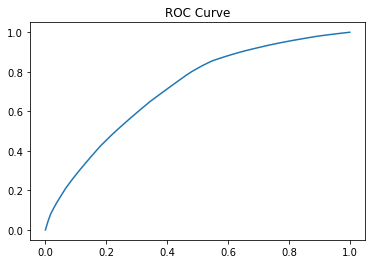

In [39]:
# ROC curve
from sklearn import metrics
fpr, tpr, _ =metrics.roc_curve(weather_2.RainTomorrow2, model3.predict())
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.show()


2. What is the AUC of this model?


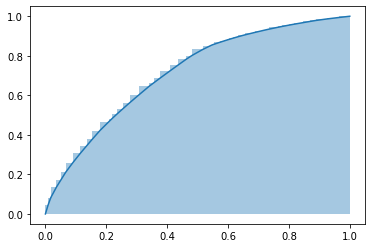

In [40]:
plt.clf()
fpr, tpr, _ = metrics.roc_curve(weather_2.RainTomorrow2, model3.predict())
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, step="pre", alpha=0.4)
plt.show()

# 2 Linear Regression

### (a) Exploration

In [41]:
#importing the data
data = sm.datasets.get_rdataset("CPSSW8", "AER").data
data

,earnings,gender,age,region,education
0,20.673077,male,31,South,14
1,24.278847,male,50,South,12
2,10.149572,male,36,South,12
3,8.894231,female,33,South,10
4,6.410256,female,56,South,10
...,...,...,...,...,...
61390,6.778846,female,51,West,13
61391,6.153846,male,52,West,14
61392,12.019231,female,44,West,12
61393,13.942307,male,39,West,12


#### (i)
Fit the model np.log(earnings) ~ age + education + gender.

In [42]:
model_1 = smf.ols("np.log(earnings) ~ age + education + gender", data = data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     6649.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:52:24   Log-Likelihood:                -42257.
No. Observations:               61395   AIC:                         8.452e+04
Df Residuals:                   61391   BIC:                         8.456e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9868      0.013     74.296      0.000       0.961       1.013
gender[T.male]     0.2339      0.004     59.651      0.000       0.226       0.242
age                0.0089      0.000     48.215      0.000       0.009       0.009
education          0.0941      0.001    118.818      0.000       0.093       0.096
==============================================================================
Omnibus:                     2743.387   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3647.470
Skew:                          -0.453   Prob(JB):                         0.00
Kurtosis:                       3.777   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.  Show the output of the model and interpret each coefficient.

-- the coefficients will effect the values of y, and all being below 1 then y values will decrease.

2. Why is there no coefficient for female?
-- Because its in the baseline (the intercept), thus not being shown

### (ii)
Fit a model with an interaction term between gender and education.

In [43]:
model_2 = smf.ols("earnings ~ age + gender * education", data = data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     5083.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:52:26   Log-Likelihood:            -2.2048e+05
No. Observations:               61395   AIC:                         4.410e+05
Df Residuals:                   61390   BIC:                         4.410e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -14.6233      0.346    -42.292      0.000     -15.301     -13.946
gender[T.male]               4.8162      0.408     11.791      0.000       4.016       5.617
age                          0.1574      0.003     46.898      0.000       0.151       0.164
education                    1.7726      0.023     78.356      0.000       1.728       1.817
gender[T.male]:education    -0.0414      0.029     -1.407      0.159      -0.099       0.016
==============================================================================
Omnibus:                     9226.186   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17079.269
Skew:                           0.959   Prob(JB):                         0.00
Kurtosis:                       4.731   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the coefficient
gender[T.male]:education. What is the p-value for this coefficient?

-- The coefficient interprets how many men are educated


In [52]:
model_2.pvalues[4]

0.15932107836934098

p value for the coefficient as seen in the model above is 0.000	

#### (iii)
use the model to predict the wages

In [53]:
model_11 = smf.ols("earnings ~ age +gender * education", data = data).fit()
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     5083.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:45   Log-Likelihood:            -2.2048e+05
No. Observations:               61395   AIC:                         4.410e+05
Df Residuals:                   61390   BIC:                         4.410e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -14.6233      0.346    -42.292      0.000     -15.301     -13.946
gender[T.male]               4.8162      0.408     11.791      0.000       4.016       5.617
age                          0.1574      0.003     46.898      0.000       0.151       0.164
education                    1.7726      0.023     78.356      0.000       1.728       1.817
gender[T.male]:education    -0.0414      0.029     -1.407      0.159      -0.099       0.016
==============================================================================
Omnibus:                     9226.186   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17079.269
Skew:                           0.959   Prob(JB):                         0.00
Kurtosis:                       4.731   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 1. A female with education = 20 and age = 40

In [54]:
fem = (-14.6233) + (0.1574 * 40) + (1.7726 * 20)
print(fem)

27.124699999999997


 2. A male with education = 20 and age = 28
 

In [55]:
male = (-14.6233) + (4.8162) + (1.7726 * 20) + (-0.0414 * 28) + (0.1574 * 28)
print(male)

28.8929


### (b) Regions

#### (i)

In [56]:
#unique regions in the dataset
set(data["region"])

{'Midwest', 'Northeast', 'South', 'West'}

In [57]:
#avg. earnings for combinitions of gender and region
avg_earn = data.groupby(['region', 'gender']).mean().reset_index()
avg_earn

,region,gender,earnings,age,education
0,Midwest,female,15.863265,41.195446,13.860805
1,Midwest,male,19.921252,40.956614,13.671017
2,Northeast,female,17.674641,41.980267,14.042390
3,Northeast,male,21.528370,41.868223,13.810090
4,South,female,15.738973,41.482675,13.632017
5,South,male,19.254426,40.911984,13.360796
6,West,female,16.500548,41.363723,13.679236
7,West,male,20.089989,40.579630,13.392477


In [58]:
from itertools import product
tab = set(product(set(data.gender), set(data["region"])))

In [59]:
data["tab"] = list(zip(data["gender"], data["region"]))
data["tab"]

0          (male, South)
1          (male, South)
2          (male, South)
3        (female, South)
4        (female, South)
              ...       
61390     (female, West)
61391       (male, West)
61392     (female, West)
61393       (male, West)
61394       (male, West)
Name: tab, Length: 61395, dtype: object

In [60]:
fit2 = smf.ols("earnings ~ tab - 1", data = data).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:52   Log-Likelihood:            -2.2802e+05
No. Observations:               61395   AIC:                         4.561e+05
Df Residuals:                   61387   BIC:                         4.561e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
tab[('female', 'Midwest')]      15.8633      0.122    130.144      0.000      15.624      16.102
tab[('female', 'Northeast')]    17.6746      0.134    131.737      0.000      17.412      17.938
tab[('female', 'South')]        15.7390      0.107    147.546      0.000      15.530      15.948
tab[('female', 'West')]         16.5005      0.125    131.794      0.000      16.255      16.746
tab[('male', 'Midwest')]        19.9213      0.108    185.096      0.000      19.710      20.132
tab[('male', 'Northeast')]      21.5284      0.120    180.142      0.000      21.294      21.763
tab[('male', 'South')]          19.2544      0.098    196.924      0.000      19.063      19.446
tab[('male', 'West')]           20.0900      0.107    188.139      0.000      19.881      20.299
==============================================================================
Omnibus:                    11140.107   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19958.784
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       4.555   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

|        | South            | Northeast        | Midwest          | West             |
|--------|------------------|------------------|------------------|------------------|
| Male   | (19.063, 19.446) | (21.294, 21.763) | (19.710, 20.132) | (19.881, 20.299) |
| Female | (15.530, 15.948) | (17.412, 17.938) | (15.624, 16.102) | (16.255, 16.746) |


#### (ii)
Add the “region” term to the model np.log(wage) ~ age + education + gender

In [61]:
model_3 = smf.ols("np.log(earnings) ~ age + education + gender + region", data = data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     3371.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:53   Log-Likelihood:                -42152.
No. Observations:               61395   AIC:                         8.432e+04
Df Residuals:                   61388   BIC:                         8.438e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9831      0.014     71.392      0.000       0.956       1.010
gender[T.male]          0.2329      0.004     59.489      0.000       0.225       0.241
region[T.Northeast]     0.0585      0.006     10.033      0.000       0.047       0.070
region[T.South]        -0.0174      0.005     -3.308      0.001      -0.028      -0.007
region[T.West]          0.0281      0.006      5.066      0.000       0.017       0.039
age                     0.0088      0.000     48.005      0.000       0.008       0.009
education               0.0936      0.001    118.091      0.000       0.092       0.095
==============================================================================
Omnibus:                     2784.532   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.689
Skew:                          -0.456   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 1. Which region is the reference class in this model?
 -- The Midwest

 2. Is the region covariate significant?
 --  since all the p-values of the region covariates are 0 so they are significant.

 3. Which region has the worst effect on wages?
 -- South, because it has the lowest coefficient of -0.0174.


#### (iii)
Add the interaction term region * education to the previous model.

In [62]:
model_4 = smf.ols("np.log(earnings) ~ age + education + gender + region * education", data = data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     2249.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:55   Log-Likelihood:                -42146.
No. Observations:               61395   AIC:                         8.431e+04
Df Residuals:                   61385   BIC:                         8.440e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.0134      0.025     40.380      0.000       0.964       1.063
gender[T.male]                    0.2330      0.004     59.502      0.000       0.225       0.241
region[T.Northeast]               0.0371      0.034      1.080      0.280      -0.030       0.104
region[T.South]                  -0.0997      0.031     -3.249      0.001      -0.160      -0.040
region[T.West]                    0.0286      0.032      0.897      0.370      -0.034       0.091
age                               0.0088      0.000     48.032      0.000       0.008       0.009
education                         0.0914      0.002     53.271      0.000       0.088       0.095
region[T.Northeast]:education     0.0016      0.002      0.640      0.522      -0.003       0.006
region[T.South]:education         0.0061      0.002      2.736      0.006       0.002       0.010
region[T.West]:education      -7.702e-05      0.002     -0.033      0.973      -0.005       0.004
==============================================================================
Omnibus:                     2789.684   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3732.981
Skew:                          -0.457   Prob(JB):                         0.00
Kurtosis:                       3.791   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 1. Interpret the coefficients of this model
 
 --Looking at the coefficients they determine the increase or descrease of y values, and in model 4 they are mostly between 0 and 1 so there will be a shift.

 2. Explain what region[T.South]:education means using one sentence.
 
 -- It means that it includes all the people from that specific region, South, and the education level of the people there

 3. Test if region * education is significant.
 
 
 -- The values that are higher aren't significant while the rest are significant

#### (iv)

 1. Predict the wages of a female of age 40 living the in the south with 0 education. Will
your predicted wages increase or decrease if you change the region to Northeast?


In [63]:
fem1 = (1.0134) + (0.0088 * 40) + (-0.0997) + (0 * 0.0061)
print(fem1)

1.2657000000000003


 2. Do you think it is best to use the model with the interaction term region * education or the model without the interaction  term? Justify your choice

----- It is best to use it wothout the interaction term, as the values we get then are more useful and applicable than the latter.

 3. Suppose you learn that Robin is 35 and resides in the south. Can you use the model in
(iii) to predict his / her wage? Why or why not?

In [64]:
robin = (1.0134) + (0.0088 * 35) + (-0.0997)
robin

1.2217000000000002

We can't accurately use it to predit her wage because we don't have enough information about Robin to get the percise / narrow the estimations for her accounts, thus the number may vary by a lot. Thus not being turstworthy.

### (c) Model fit and model choice

#### (i) 

using "np.log(wages) ~ age + education * gender" in this subexercise.

In [65]:
model_5 = smf.ols("np.log(earnings) ~ age + education * gender", data = data).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     5038.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:58   Log-Likelihood:                -42180.
No. Observations:               61395   AIC:                         8.437e+04
Df Residuals:                   61390   BIC:                         8.442e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.8188      0.019     43.212      0.000       0.782       0.856
gender[T.male]               0.5076      0.022     22.677      0.000       0.464       0.551
age                          0.0090      0.000     48.829      0.000       0.009       0.009
education                    0.1060      0.001     85.489      0.000       0.104       0.108
education:gender[T.male]    -0.0200      0.002    -12.419      0.000      -0.023      -0.017
==============================================================================
Omnibus:                     2746.431   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3644.222
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.773   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Plot the distribution of the residuals using a QQ plot and a histogram.

------- residual values

In [66]:
resi = model_5.resid
print(resi)

0        0.220323
1        0.382405
2       -0.364026
3        0.010415
4       -0.523667
           ...   
61390   -0.740794
61391   -1.180047
61392    0.000760
61393   -0.073475
61394    0.076758
Length: 61395, dtype: float64


--------QQ Plot

Figure(432x288)


Text(0.5, 1.0, 'QQ PLOT')

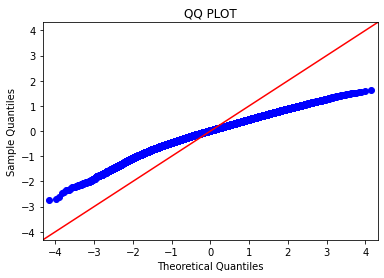

In [67]:
qq= sm.qqplot(resi,  line = '45')
print(qq)
plt.title("QQ PLOT")

-------Histogram

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Histogram')

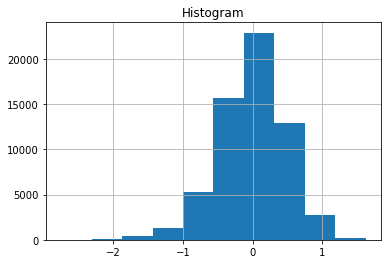

In [68]:
reshist = resi.hist()
print(reshist)
plt.title("Histogram")

Are the residuals normal? If not, do they deviate from normality in a way we expect to have serious implications for inference?

 -- Yes, the residual are normal


2. resdidual vs fitted value model

In [69]:
resi = model_5.resid

In [70]:
fitt = model_5.fittedvalues
print(fitt)

0        2.808509
1        2.807201
2        2.681458
3        2.174988
4        2.381566
           ...   
61390    2.654601
61391    2.997124
61392    2.485748
61393    2.708403
61394    2.401718
Length: 61395, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual')

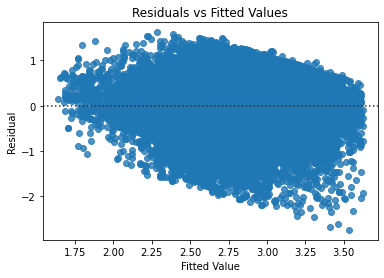

In [71]:
plot1 = sns.residplot(fitt, resi)
print(plot1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")

#### (ii) 5 logistic model testings


In [72]:
model_51 = smf.ols("np.log(earnings) ~ age + gender", data = data).fit()
model_51.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2369.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:55:03   Log-Likelihood:                -48611.
No. Observations:               61395   AIC:                         9.723e+04
Df Residuals:                   61392   BIC:                         9.726e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2318      0.009    246.565      0.000       2.214       2.250
gender[T.male]     0.2113      0.004     48.644      0.000       0.203       0.220
age                0.0101      0.000     49.732      0.000       0.010       0.011
==============================================================================
Omnibus:                      878.950   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              921.776
Skew:                          -0.289   Prob(JB):                    6.90e-201
Kurtosis:                       3.164   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model_52 = smf.ols("np.log(earnings) ~ region + age + gender", data = data).fit()
model_52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1024.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:55:04   Log-Likelihood:                -48436.
No. Observations:               61395   AIC:                         9.688e+04
Df Residuals:                   61389   BIC:                         9.694e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.2335      0.010    228.982      0.000       2.214       2.253
region[T.Northeast]     0.0722      0.006     11.183      0.000       0.060       0.085
region[T.South]        -0.0431      0.006     -7.430      0.000      -0.055      -0.032
region[T.West]          0.0061      0.006      0.998      0.318      -0.006       0.018
gender[T.male]          0.2103      0.004     48.554      0.000       0.202       0.219
age                     0.0100      0.000     49.388      0.000       0.010       0.010
==============================================================================
Omnibus:                      891.890   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.824
Skew:                          -0.289   Prob(JB):                    2.26e-204
Kurtosis:                       3.180   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model_53 = smf.ols("np.log(earnings) ~ education * age + region", data = data).fit()
model_53.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2632.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:55:04   Log-Likelihood:                -43865.
No. Observations:               61395   AIC:                         8.774e+04
Df Residuals:                   61388   BIC:                         8.781e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9883      0.046     21.278      0.000       0.897       1.079
region[T.Northeast]     0.0580      0.006      9.674      0.000       0.046       0.070
region[T.South]        -0.0221      0.005     -4.098      0.000      -0.033      -0.012
region[T.West]          0.0322      0.006      5.641      0.000       0.021       0.043
education               0.1036      0.003     30.606      0.000       0.097       0.110
age                     0.0125      0.001     11.754      0.000       0.010       0.015
education:age          -0.0003   7.77e-05     -3.735      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     2094.699   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2583.370
Skew:                          -0.402   Prob(JB):                         0.00
Kurtosis:                       3.604   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model_54 = smf.ols("np.log(earnings) ~ gender * education ", data = data).fit()
model_54.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     5701.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:55:04   Log-Likelihood:                -43350.
No. Observations:               61395   AIC:                         8.671e+04
Df Residuals:                   61391   BIC:                         8.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.1924      0.018     67.492      0.000       1.158       1.227
gender[T.male]               0.4510      0.023     19.795      0.000       0.406       0.496
education                    0.1059      0.001     83.818      0.000       0.103       0.108
gender[T.male]:education    -0.0161      0.002     -9.835      0.000      -0.019      -0.013
==============================================================================
Omnibus:                     2321.654   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2921.224
Skew:                          -0.423   Prob(JB):                         0.00
Kurtosis:                       3.653   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model_55 = smf.ols("np.log(earnings) ~ age * gender + region", data = data).fit()
model_55.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(earnings)   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     879.0
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:55:05   Log-Likelihood:                -48363.
No. Observations:               61395   AIC:                         9.674e+04
Df Residuals:                   61388   BIC:                         9.680e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.3468      0.014    173.083      0.000       2.320       2.373
gender[T.male]          0.0076      0.017      0.438      0.661      -0.026       0.042
region[T.Northeast]     0.0721      0.006     11.172      0.000       0.059       0.085
region[T.South]        -0.0427      0.006     -7.370      0.000      -0.054      -0.031
region[T.West]          0.0068      0.006      1.110      0.267      -0.005       0.019
age                     0.0073      0.000     23.916      0.000       0.007       0.008
age:gender[T.male]      0.0049      0.000     12.020      0.000       0.004       0.006
==============================================================================
Omnibus:                      901.389   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              950.608
Skew:                          -0.289   Prob(JB):                    3.79e-207
Kurtosis:                       3.195   Cond. No.                         479.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model_54 is prefered as it has the highest r-squared, as shown the one with transfromed interactives gives highest.

#### (iii) R-squared from the 5 models in (ii)

|          | R-squared   | 
|----------|-------------|
| model_51 | 0.072       | 
| model_52 | 0.077       | 
| model_53 | 0.205       | 
| model_54 | 0.218       |
| model_55 | 0.079       | 


# 3 Simulations

### (a) Implementing the function

#### (i)
Implement the sample skewness as the function skewness taking x as an argument. Run the
function on the vector np.array([7,0.3,1,33,0,6]).

In [77]:
def skewness(x):
    
    sample_mean = np.mean(x)
    
    s = []
    
    for i in x:
        
        s.append(i-sample_mean) 
        
    a = np.array(s)
    
    skew = ((sum(a**3))/len(a)) / ((sum(a**2))*(1/len(a)))**(3/2)
    
    return skew

skewness(np.array([7,0.3,1,33,0,6]))

print("Skewness:", skewness(np.array([7,0.3,1,33,0,6])))

Skewness: 1.5723844222148309


#### (ii)
Now implement the sample kurtosis as the function kurtosis taking a Numpy array x as an
argument. Run the function on the vector np.array([2,1,0.5,1,2,5]).

In [78]:
def kurtosis(y):
    
    sample_mean = np.mean(y)
    
    k = []
    
    for i in y:
        
        k.append(i - sample_mean) 
        
    b = np.array(k)
    
    kurt = ((sum(b**4))/len(b)) / ((sum(b**2))*(1/len(b)))**(2)
    
    return kurt

kurtosis(np.array([2,1,0.5,1,2,5]))

print("Kurtosis:", kurtosis(np.array([2,1,0.5,1,2,5])))

Kurtosis: 3.2954950293066902


#### (iii)
Make the jarque_beta function, taking x as an argument, that implements the Jarque-Bera
test.

In [85]:
def jarque_beta(x):
    
    sample_mean = np.mean(x)
    
    s = []
    
    for i in x:
        
        s.append(i-sample_mean) 
        
    a = np.array(s)
    
    skew = skewness(x)
    
    kurt = kurtosis(x)

    z = ((((kurt-3) ** 2) * (1/4)) + (skew ** 2))/(len(x)/6)

    return(z)

jarque_beta(np.array([7,0.3,1,33,0,6]))

2.6317260545008505

### (b) Simulations

#### (i)

In [87]:
def jarque_bera_normal(n,mu,sigma,n_reps):

    s = np.random.normal(mu, sigma, size = (n,n_reps))
    jb = jarque_beta(s)
    
    return(jb)
    
jarque_bera_normal(100,0,1,100)

array([0.04914986, 0.00889735, 0.00424943, 0.00663245, 0.01059467,
       0.00016244, 0.00432918, 0.0047379 , 0.01024344, 0.00179331,
       0.00180398, 0.00867545, 0.00486537, 0.00510024, 0.00997912,
       0.00133748, 0.00274732, 0.00839152, 0.00658238, 0.00299377,
       0.0020547 , 0.01415455, 0.0068487 , 0.02065494, 0.00519203,
       0.01149475, 0.01486406, 0.00275791, 0.01038246, 0.03153824,
       0.0065543 , 0.01112199, 0.01089433, 0.00210524, 0.03097027,
       0.00721433, 0.00755736, 0.01673492, 0.01708642, 0.01075285,
       0.0054758 , 0.00543659, 0.00742517, 0.0041319 , 0.00012828,
       0.00155623, 0.00777084, 0.00191299, 0.00298003, 0.0214785 ,
       0.00195001, 0.00793726, 0.01667435, 0.01357102, 0.00969592,
       0.01890164, 0.00130511, 0.02168533, 0.02637822, 0.00574967,
       0.00160918, 0.01517864, 0.00953481, 0.01679978, 0.00140364,
       0.00145506, 0.01286468, 0.004274  , 0.0130896 , 0.00348567,
       0.02058974, 0.00345164, 0.02649954, 0.02441665, 0.00883

#### (ii)

<AxesSubplot:ylabel='Count'>

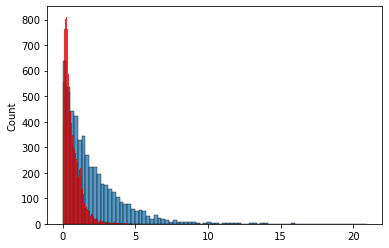

In [93]:
x = jarque_bera_normal(10, 0, 1, 10000)
x2= np.random.chisquare(df=2, size= 5000)
fig, ax = plt.subplots()
sns.histplot(x2, ax=ax)
sns.histplot(x, ax=ax, color = '#FF0000')

Looking at the 2 plots, the distributions do match, having a similar shape while having very different axis. Thus, concluding that the Jarque bera test does match the 𝜒2 distribution.

#### (iii)

The jarque-bera test is done to figure out whether skewness and kurtosis have a normal distribution. 

So knowing this and looking at the data collected above we reject the bull hypothesis and we got our result as a p-value is because, the values were below or equal to 0.05 and are always positive, thus concluding it doesn’t follow a normal distribution.